In [1]:
import pandas as pd
import numpy as np
import copy
from sklearn.datasets import load_breast_cancer
from sklearn import metrics

In [2]:
# TASK 1 Membaca ( Load ) Dataset
cancer = load_breast_cancer() # Load file dari library
breast = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target'])) # Converting
print(breast)

tenis = pd.read_csv("Data/play_tennis.csv") # Read csv classic
print(tenis)


     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [3]:
# SPLITTING FILES 
from sklearn.model_selection import train_test_split # For splitting purpose

X_train_breast, X_test_breast, y_train_breast, y_test_breast = train_test_split(cancer.data, cancer.target, test_size=0.2,random_state=2)
train_tenis, test_tenis= train_test_split(tenis, test_size=0.2, random_state=3)

In [19]:
# Algoritma 1 - Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

dt = DecisionTreeClassifier(criterion="gini",random_state=1)
dt.fit(X_train_breast,y_train_breast)
y_pred_breast = dt.predict(X_test_breast)
accuracy_score(y_test_breast,y_pred_breast)

0.9122807017543859

'breast.pdf'

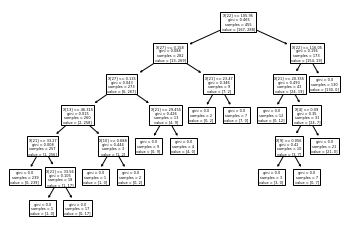

In [5]:
# Untuk export data ke pdf
from sklearn import tree
import graphviz
tree.plot_tree(dt)
dot_data = tree.export_graphviz(dt, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("breast")  

In [6]:
# Algoritma 1 untuk data tenis
from sklearn.preprocessing import LabelEncoder
train_tenis = train_tenis.copy()
test_tenis = test_tenis.copy()

le = LabelEncoder()
for col in ['outlook', 'temp', 'humidity', 'wind', 'play']:
    train_tenis[col + '_num'] = le.fit_transform(train_tenis[col])
    test_tenis[col + '_num'] = le.fit_transform(test_tenis[col])
    
X_train_tenis = train_tenis[['outlook_num', 'temp_num', 'humidity_num', 'wind_num']]
X_test_tenis = test_tenis[['outlook_num', 'temp_num', 'humidity_num', 'wind_num']]
y_train_tenis = train_tenis['play_num']
y_test_tenis = test_tenis['play_num']

dt2 = DecisionTreeClassifier(criterion="gini",random_state=1)
dt2.fit(X_train_tenis,y_train_tenis)
y_pred_tenis = dt2.predict(X_test_tenis)
accuracy_score(y_test_tenis,y_pred_tenis)

0.6666666666666666

'tenis.pdf'

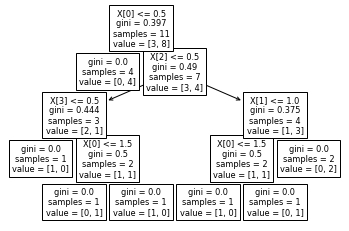

In [7]:
# Untuk export data ke pdf
from sklearn import tree
import graphviz
tree.plot_tree(dt2)
dot_data2 = tree.export_graphviz(dt2, out_file=None)
graph2 = graphviz.Source(dot_data2)
graph2.render("tenis") 

In [8]:
import sys
!{sys.executable} -m pip install decision-tree-id3
!{sys.executable} -m pip install six

In [59]:
# Algoritma 2 - Id3Estimator
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator

estimator = Id3Estimator(prune=True, gain_ratio=True)
estimator = estimator.fit(X_train_breast, y_train_breast)
y_pred_breast = estimator.predict(X_test_breast)
print("Accuracy Score : " + str(accuracy_score(y_test_breast,y_pred_breast)))
print("F1 Score : " +str(f1_score(y_test_breast,y_pred_breast)))

Accuracy Score : 0.9210526315789473
F1 Score : 0.9343065693430658


In [65]:
# Algoritma 2 untuk Tenis
estimator = Id3Estimator(prune=True, gain_ratio=True)
estimator = estimator.fit(X_train_tenis, y_train_tenis)
y_pred_tenis = estimator.predict(X_test_tenis)
print("Accuracy Score : " + str(accuracy_score(y_test_tenis,y_pred_tenis)))
print("F1 Score : " +str(f1_score(y_test_tenis,y_pred_tenis)))

Accuracy Score : 0.3333333333333333
F1 Score : 0.5


In [114]:
# Algoritma 3 - KMeans
from sklearn.cluster import KMeans

# Breast section
kmeans_breast = KMeans(n_clusters=2,max_iter=10000, random_state=13)
kmeans_breast = kmeans_breast.fit(X_train_breast, y_train_breast)
y_pred_breast = kmeans_breast.predict(X_test_breast)
print("Accuracy Score Breast : " + str(accuracy_score(y_test_breast,y_pred_breast)))
print("F1 Score Breast : " +str(f1_score(y_test_breast,y_pred_breast)))

# Tenis section
kmeans_tenis = KMeans(n_clusters=2,max_iter=10000, random_state=7)
kmeans_tenis = kmeans_tenis.fit(X_train_tenis, y_train_tenis)
y_pred_tenis = kmeans_tenis.predict(X_test_tenis)
print("Accuracy Score Tenis : " + str(accuracy_score(y_test_tenis,y_pred_tenis)))
print("F1 Score Tenis : " +str(f1_score(y_test_tenis,y_pred_tenis)))

Accuracy Score Breast : 0.14035087719298245
F1 Score Breast : 0.019999999999999997
Accuracy Score Tenis : 1.0
F1 Score Tenis : 1.0


In [11]:
# Algoritma 4 - Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=2000)

logreg.fit(X_train_breast, y_train_breast)

y_pred_breast = logreg.predict(X_test_breast)
cnf_matrix_breast = metrics.confusion_matrix(y_test_breast, y_pred_breast)

print(cnf_matrix_breast)
print("Accuracy:",metrics.accuracy_score(y_test_breast, y_pred_breast))
print("Precision:",metrics.precision_score(y_test_breast, y_pred_breast))
print("Recall:",metrics.recall_score(y_test_breast, y_pred_breast))
print("F1 Score:",metrics.f1_score(y_test_breast, y_pred_breast))

[[41  4]
 [ 4 65]]
Accuracy: 0.9298245614035088
Precision: 0.9420289855072463
Recall: 0.9420289855072463
F1 Score: 0.9420289855072463


In [12]:
from sklearn.preprocessing import LabelEncoder

train_tenis = train_tenis.copy()
test_tenis = test_tenis.copy()

le = LabelEncoder()
for col in ['outlook', 'temp', 'humidity', 'wind', 'play']:
    train_tenis[col + '_num'] = le.fit_transform(train_tenis[col])
    test_tenis[col + '_num'] = le.fit_transform(test_tenis[col])
    
X_train_tenis = train_tenis[['outlook_num', 'temp_num', 'humidity_num', 'wind_num']]
X_test_tenis = test_tenis[['outlook_num', 'temp_num', 'humidity_num', 'wind_num']]
y_train_tenis = train_tenis['play_num']
y_test_tenis = test_tenis['play_num']

logreg.fit(X_train_tenis, y_train_tenis)

y_pred_tenis = logreg.predict(X_test_tenis)
cnf_matrix_tenis = metrics.confusion_matrix(y_test_tenis, y_pred_tenis)

print(cnf_matrix_tenis)
print("Accuracy:",metrics.accuracy_score(y_test_tenis, y_pred_tenis))
print("Precision:",metrics.precision_score(y_test_tenis, y_pred_tenis))
print("Recall:",metrics.recall_score(y_test_tenis, y_pred_tenis))
print("F1 Score:",metrics.f1_score(y_test_tenis, y_pred_tenis))

[[0 2]
 [0 1]]
Accuracy: 0.3333333333333333
Precision: 0.3333333333333333
Recall: 1.0
F1 Score: 0.5


In [13]:
# Algoritma 5 - Neural Network
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=[8,8,8], max_iter=2000)

mlp.fit(X_train_breast, y_train_breast)

y_pred_breast = mlp.predict(X_test_breast)
cnf_matrix_breast = metrics.confusion_matrix(y_test_breast, y_pred_breast)

print(cnf_matrix_breast)
print("Accuracy:",metrics.accuracy_score(y_test_breast, y_pred_breast))
print("Precision:",metrics.precision_score(y_test_breast, y_pred_breast))
print("Recall:",metrics.recall_score(y_test_breast, y_pred_breast))
print("F1 Score:",metrics.f1_score(y_test_breast, y_pred_breast))

[[40  5]
 [ 5 64]]
Accuracy: 0.9122807017543859
Precision: 0.927536231884058
Recall: 0.927536231884058
F1 Score: 0.927536231884058


In [14]:
train_tenis = train_tenis.copy()
test_tenis = test_tenis.copy()

le = LabelEncoder()
for col in ['outlook', 'temp', 'humidity', 'wind', 'play']:
    train_tenis[col + '_num'] = le.fit_transform(train_tenis[col])
    test_tenis[col + '_num'] = le.fit_transform(test_tenis[col])
    
X_train_tenis = train_tenis[['outlook_num', 'temp_num', 'humidity_num', 'wind_num']]
X_test_tenis = test_tenis[['outlook_num', 'temp_num', 'humidity_num', 'wind_num']]
y_train_tenis = train_tenis['play_num']
y_test_tenis = test_tenis['play_num']

mlp.fit(X_train_tenis, y_train_tenis)

y_pred_tenis = logreg.predict(X_test_tenis)
cnf_matrix_tenis = metrics.confusion_matrix(y_test_tenis, y_pred_tenis)

print(cnf_matrix_tenis)
print("Accuracy:",metrics.accuracy_score(y_test_tenis, y_pred_tenis))
print("Precision:",metrics.precision_score(y_test_tenis, y_pred_tenis))
print("Recall:",metrics.recall_score(y_test_tenis, y_pred_tenis))
print("F1 Score:",metrics.f1_score(y_test_tenis, y_pred_tenis))

[[0 2]
 [0 1]]
Accuracy: 0.3333333333333333
Precision: 0.3333333333333333
Recall: 1.0
F1 Score: 0.5


In [15]:
# Algoritma 6 - SVM
from sklearn import svm

clf = svm.SVC(kernel = "linear")

clf.fit(X_train_breast, y_train_breast)

y_pred_breast = clf.predict(X_test_breast)
cnf_matrix_breast = metrics.confusion_matrix(y_test_breast, y_pred_breast)

print(cnf_matrix_breast)
print("Accuracy:",metrics.accuracy_score(y_test_breast, y_pred_breast))
print("Precision:",metrics.precision_score(y_test_breast, y_pred_breast))
print("Recall:",metrics.recall_score(y_test_breast, y_pred_breast))
print("F1 Score:",metrics.f1_score(y_test_breast, y_pred_breast))

[[42  3]
 [ 3 66]]
Accuracy: 0.9473684210526315
Precision: 0.9565217391304348
Recall: 0.9565217391304348
F1 Score: 0.9565217391304348


In [16]:
train_tenis = train_tenis.copy()
test_tenis = test_tenis.copy()

le = LabelEncoder()
for col in ['outlook', 'temp', 'humidity', 'wind', 'play']:
    train_tenis[col + '_num'] = le.fit_transform(train_tenis[col])
    test_tenis[col + '_num'] = le.fit_transform(test_tenis[col])
    
X_train_tenis = train_tenis[['outlook_num', 'temp_num', 'humidity_num', 'wind_num']]
X_test_tenis = test_tenis[['outlook_num', 'temp_num', 'humidity_num', 'wind_num']]
y_train_tenis = train_tenis['play_num']
y_test_tenis = test_tenis['play_num']

clf.fit(X_train_tenis, y_train_tenis)

y_pred_tenis = logreg.predict(X_test_tenis)
cnf_matrix_tenis = metrics.confusion_matrix(y_test_tenis, y_pred_tenis)

print(cnf_matrix_tenis)
print("Accuracy:",metrics.accuracy_score(y_test_tenis, y_pred_tenis))
print("Precision:",metrics.precision_score(y_test_tenis, y_pred_tenis))
print("Recall:",metrics.recall_score(y_test_tenis, y_pred_tenis))
print("F1 Score:",metrics.f1_score(y_test_tenis, y_pred_tenis))

[[0 2]
 [0 1]]
Accuracy: 0.3333333333333333
Precision: 0.3333333333333333
Recall: 1.0
F1 Score: 0.5
